In [1289]:
import keras as keras
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn import datasets

from matplotlib import rcParams
import numpy as np

from sklearn.model_selection import train_test_split
rcParams["figure.figsize"] = 10, 5
%matplotlib inline
import pandas as pd

In [1290]:
iris = datasets.load_iris()

x = iris.data
y = iris.target


In [1291]:
test_size=0.3
random_state = 0
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size)

In [1292]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

print("Unique label: {0}".format(np.unique(y)))

Unique label: [0 1 2]


In [1293]:
x_train_std = x_train_std[:, [2, 3]]
x_test_std = x_test_std[:, [2, 3]]

In [1294]:
n_iter = 140
eta0 = 0.1

ppn = Perceptron(max_iter=n_iter, eta0=eta0, random_state=150, penalty='elasticnet', l1_ratio=0.1, fit_intercept=True, tol=1e-10)

lrr = LogisticRegression(penalty='elasticnet',l1_ratio=0.1, tol=1e-10, fit_intercept=True, random_state=150, max_iter=n_iter, solver='saga')

lrr.fit(x_train_std, y_train)
ppn.fit(x_train_std,y_train)

y_pred = ppn.predict(x_test_std)
y_pred_lrr = lrr.predict(x_test_std)
print("accuracy: {0:.2f}%".format(accuracy_score(y_test,y_pred) * 100))
print("accuracy: {0:.2f}%".format(accuracy_score(y_test,y_pred_lrr) * 100))
# Predictions seem to be unstable.

accuracy: 95.56%
accuracy: 97.78%


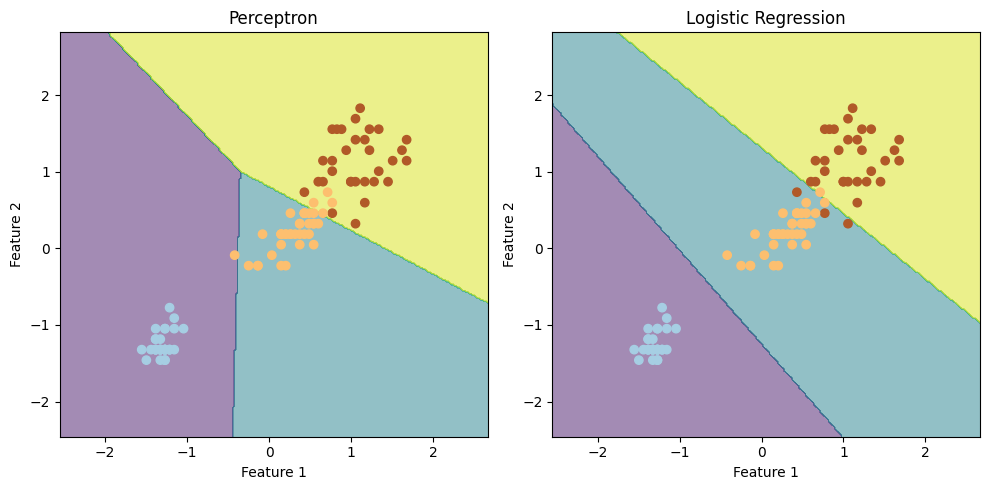

In [1295]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

x_min, x_max = x_train_std[:, 0].min() - 1, x_train_std[:, 0].max() + 1
y_min, y_max = x_train_std[:, 1].min() - 1, x_train_std[:, 1].max() + 1
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_points = np.c_[xx.ravel(), yy.ravel()]
plt.figure(figsize=(10, 5))
ppn_predictions = ppn.predict(grid_points)
lrr_predictions = lrr.predict(grid_points)

# Reshape the predictions to match the meshgrid dimensions
ppn_predictions = ppn_predictions.reshape(xx.shape)
lrr_predictions = lrr_predictions.reshape(xx.shape)
# Plot the Perceptron decision boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, ppn_predictions, alpha=0.5)
plt.scatter(x_train_std[:, 0], x_train_std[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("Perceptron")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the Logistic Regression decision boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, lrr_predictions, alpha=0.5)
plt.scatter(x_train_std[:, 0], x_train_std[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

In [1296]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
from keras.layers import Dense
tf.random.set_seed(3)
from keras.models import Sequential
from tensorflow import keras


model = Sequential()
model.add(Dense(100,input_shape=(4,), activation="relu"))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train,y_train, epochs=20)

4/4 [==============================] - 0s 1000us/step - loss: 0.5873 - accuracy: 0.7619
Epoch 17/20
4/4 [==============================] - 0s 1000us/step - loss: 0.5709 - accuracy: 0.8190
Epoch 18/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.9333
Epoch 19/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5444 - accuracy: 0.9619
Epoch 20/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5312 - accuracy: 0.9524


Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 1.2334 - accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 0s 1ms/step - loss: 1.0322 - accuracy: 0.3714
Epoch 3/20
4/4 [==============================] - 0s 1ms/step - loss: 0.9202 - accuracy: 0.6476
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.8535 - accuracy: 0.7048
Epoch 5/20
4/4 [==============================] - 0s 1ms/step - loss: 0.8118 - accuracy: 0.7619
Epoch 6/20
4/4 [==============================] - 0s 1ms/step - loss: 0.7849 - accuracy: 0.7619
Epoch 7/20
4/4 [==============================] - 0s 1ms/step - loss: 0.7601 - accuracy: 0.8381
Epoch 8/20
4/4 [==============================] - 0s 1ms/step - loss: 0.7359 - accuracy: 0.8857
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.9048
Epoch 10/20
4/4 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.7619
Epoch 11/20
4/4 [======================